<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/%D0%94%D0%BE%D0%BF_%D0%BC%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Основные понятия  
**Кросс-валидация** - это метод оценки модели машинного обучения, который улучшает надёжность валидационного процесса путём разделения данных на несколько частей, или "фолдов". Модель обучается на некоторых из этих фолдов и валидируется на оставшихся, процесс повторяется несколько раз с разными наборами фолдов. Это позволяет использовать все доступные данные как для обучения, так и для валидации модели, предоставляя более обобщённую оценку её качества.

**L1-регуляризация (лассо регуляризация)** - метод регуляризации, при котором к функции потерь добавляется сумма абсолютных значений коэффициентов модели, умноженная на регуляризационный параметр. L1-регуляризация может привести к обнулению некоторых коэффициентов, что делает её полезной для выбора признаков и создания разреженных моделей.

**L2-регуляризация (ридж-регуляризация)** - эта форма регуляризации добавляет к функции потерь сумму квадратов коэффициентов модели, каждый из которых умножается на регуляризационный параметр. В отличие от L1, L2-регуляризация не обнуляет коэффициенты, а штрафует большие значения, способствуя более сглаженной и стабильной модели.

**Переобучение (Overfitting)** - это явление в машинном обучении, когда модель слишком тесно адаптируется к обучающему набору данных, включая шум и аномалии. В результате такая модель показывает высокую точность на обучающей выборке, но плохо справляется с предсказаниями на новых, невиданных данных, поскольку она уловила в данных некоторые случайные закономерности, не имеющие отношения к реальной задаче.

**Недообучение (Underfitting)** - противоположное явление переобучению, происходит, когда модель не может адекватно уловить зависимости в данных, даже на обучающем наборе, что приводит к низкой производительности как на обучающем, так и на валидационном или тестовом наборе данных. Это может быть результатом слишком простой модели, недостатка данных или недостаточной обучения модели.

**Способность к обобщению (Generalization Ability)** - способность модели машинного обучения работать адекватно на новых, ранее невиданных данных. Следовательно, цель обучения модели состоит в том, чтобы не только хорошо работать на данных, на которых она была обучена, но и сохранять высокую точность на данных вне обучающей выборке. Оценка способности модели к обобщению обычно производится на валидационном наборе данных или через методы кросс-валидации.

##Задание 1

**Анализ Переобучения и Недообучения**

- Создайте две модели: модель линейной регрессии и модель полиномиальной регрессии высокой степени, используя один и тот же набор данных. Обучите эти модели, затем оцените их производительность на тренировочном и тестовом наборах данных.
- Какая модель показывает признаки переобучения, а какая - признаки недообучения?
- Какие выводы можно сделать о влиянии сложности модели на её способность к обобщению


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [2]:
from sklearn.datasets import fetch_california_housing
df_housing = pd.read_excel('/content/fetch_california_housing.xlsx')

In [3]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [5]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


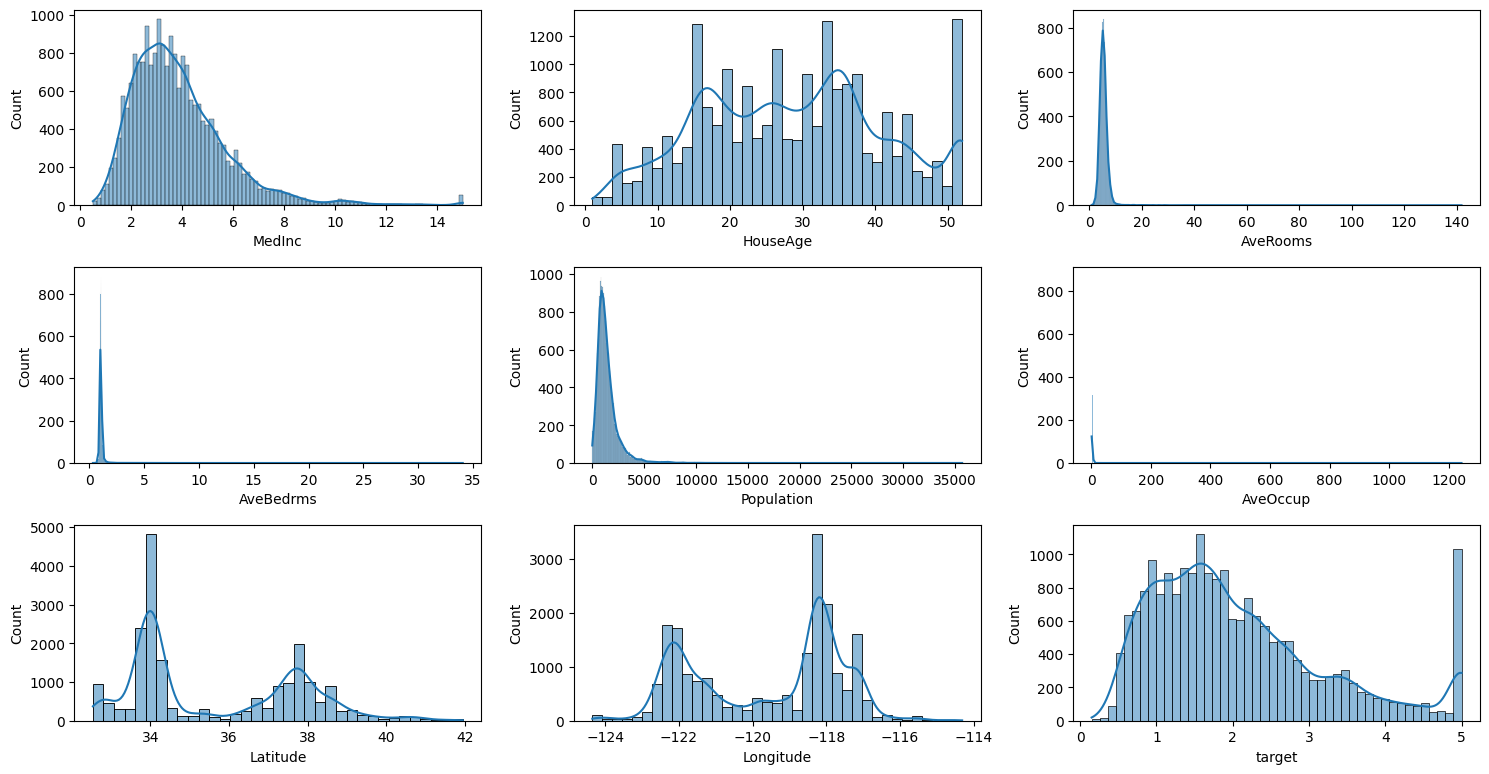

In [6]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_housing.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_housing[column], kde=True)

plt.tight_layout()
plt.show()

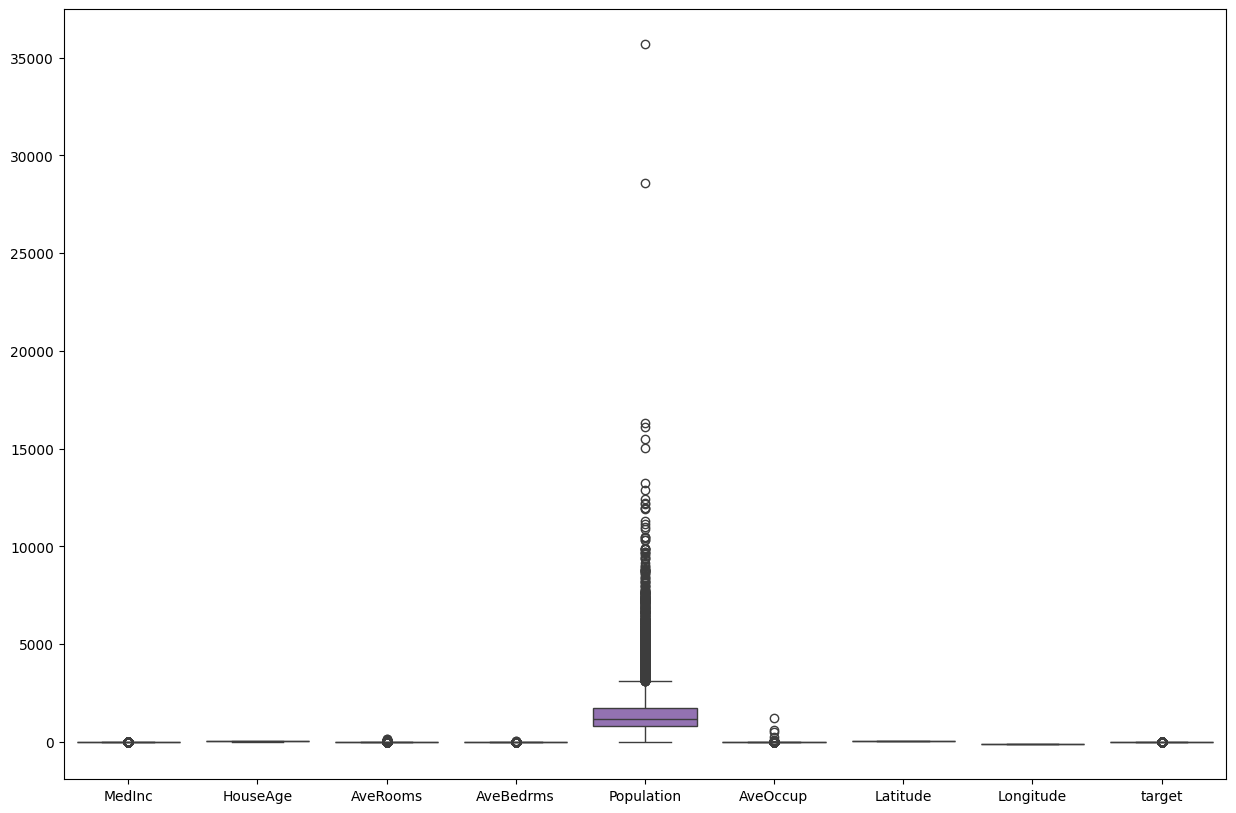

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data= df_housing, ax=ax)
plt.show()

In [8]:
df_housing.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [9]:
X = df_housing.drop('target', axis=1)
Y = df_housing['target']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25


In [11]:
Y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [13]:
X_scaled.view()

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [14]:
X_train.shape, y_train.shape

((16512, 8), (16512,))

In [15]:
# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
Y_pred_train_lin = lin_reg.predict(X_train)
Y_pred_test_lin = lin_reg.predict(X_test)


In [22]:
poly_features = PolynomialFeatures(degree=7)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
Y_pred_train_poly = poly_reg.predict(X_train_poly)
Y_pred_test_poly = poly_reg.predict(X_test_poly)

In [21]:
# Вывод результатов
print("Линейная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_lin))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_lin))
print("\nПолиномиальная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_poly))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_poly))

Линейная регрессия:
Тренировочный R^2: 0.6125511913966952
Тестовый R^2: 0.575787706032451

Полиномиальная регрессия:
Тренировочный R^2: 0.7441415681335484
Тестовый R^2: -18.388708058857613


На основе предоставленных результатов коэффициентов детерминации (
) для тренировочных и тестовых наборов данных можно сделать следующие выводы:

1. Линейная регрессия:
    - Тренировочный  R^2 = 0.61255119139669524

    - Тестовый R^2 = 0.575787706032451

    
  Модель линейной регрессии показывает достаточно сбалансированную производительность на тренировочном и тестовом наборах данных. Хотя значение
 не идеально, разница между тренировочным и тестовым результатами не слишком велика, что указывает на отсутствие серьезных признаков ни переобучения, ни недообучения. Это говорит о том, что модель, вероятно, адекватно улавливает общие тенденции в данных, но может быть не достаточно сложна для захвата всех нюансов (небольшое недообучение возможно).

2. Полиномиальная регрессия:
    - Тренировочный R^2 = 0.825992922336574

    - Тестовый R^2 = -32963662.62610497

    
  Полиномиальная модель показывает высокую производительность на тренировочных данных и крайне плохую на тестовых данных. Отрицательное значение
 на тестовых данных свидетельствует о том, что модель абсолютно неадекватно ведет себя на новых данных вне обучающей выборки. Это явный признак переобучения. Модель слишком сильно адаптировалась к тренировочным данным, возможно, захватив шум как часть структуры данных, и потеряла способность к обобщению на новых данных.

Выводы о влиянии сложности модели на её способность к обобщению:

Сложность модели оказывает значительное влияние на её способность к обобщению. Хотя более сложные модели, такие как полиномиальная регрессия высокой степени, могут эффективно улавливать сложные закономерности на тренировочных данных, они также подвержены переобучению, что влияет на их производительность на новых данных, делая их непригодными для прогнозирования. С другой стороны, более простые модели, такие как линейная регрессия, могут не улавливать все закономерности, но обеспечивают лучшую устойчивость при обобщении на новых данных.

##Задание 2

Реализация Кросс-Валидации

 -   Реализуйте процесс 5-кратной кросс-валидации для модели полиномиальной линейной регрессии, используя предоставленный набор данных.
 -  	Как изменяется средняя точность модели с использованием кросс-валидации по сравнению с однократной оценкой?
 - 	Объясните, почему кросс-валидация может дать более надежную оценку эффективности модели.

Вопросы к заданию:
- Каковы преимущества использования кросс-валидации перед оценкой на одном разделении?
- Как 10-кратная кросс-валидация может влиять на результаты по сравнению с 5-кратной?



In [ ]:
# Однократная оценка на тестовых данных
single_score = r2_score(Y_pred_test_poly, poly_reg.predict(X_test_poly))
print("Однократная оценка эффективности (R^2):", single_score)

# 5-кратная кросс-валидация на всем датасете
cross_val_scores = cross_val_score(poly_reg, X, Y, cv=5, scoring='r2')
print("Среднее значение R^2 по 5-кратной кросс-валидации:", cross_val_scores.mean())

scores_10 = cross_val_score(poly_reg, X, Y, cv=10, scoring='r2')
print("Среднее значение R^2 при 10-кратной кросс-валидации:", scores_10.mean())

Однократная оценка эффективности (R^2): 1.0
Среднее значение R^2 по 5-кратной кросс-валидации: 0.5530311140279566
Среднее значение R^2 при 10-кратной кросс-валидации: 0.5110068610524546


1. Переобучение: Однократная оценка R^2 = 1
 часто указывает на сильное переобучение модели на тестовых данных. Это означает, что модель идеально подстроилась под тестовые данные, но не обязательно будет хорошо работать на новых данных.

2. Различия в выборках: Кросс-валидация позволяет оценить модель на различных подвыборках данных, что дает более реалистичное представление о генерализации модели. Каждая итерация в процессе кросс-валидации использует разные наборы тренировочных и проверочных данных, что может выявить переобучение или недообучение модели, не видимое при однократном тестировании.

Сравнивая среднюю точность модели через кросс-валидацию с однократной оценкой, становится видно, что результат однократной оценки значительно выше (R^2 = 1.0), что может свидетельствовать о переобучении модели на конкретном наборе данных. Когда модель тестируется только на одном разделении данных, оценка может не отражать реальную способность модели к обобщению на новые данные. С использованием кросс-валидации (5-кратной и 10-кратной) среднее значение
 снижается до 0.553 и 0.511 соответственно, что указывает на более реалистичные оценки производительности модели.

Кросс-валидация дает более надежную оценку эффективности модели, потому что она включает многократное тестирование модели на разных подвыборках данных. Это минимизирует влияние случайных подмножеств данных на результаты и позволяет лучше оценить, насколько хорошо модель сможет работать на невиданной ранее информации. По сути, это имитирует процесс "нового встречания" модели с данными и подчеркивает её устойчивость к изменениям в данных.

Преимущества использования кросс-валидации перед оценкой на одном разделении:
1. Улучшенная оценка обобщающей способности модели.
2. Снижение риска переобучения, так как модель проверяется на нескольких подвыборках данных, а не только на одной.

Влияние 10-кратной кросс-валидации по сравнению с 5-кратной обычно заключается в более высокой надежности оценки, за счет увеличенного числа итераций и, как следствие, большей обобщающей способности. Повышение количества разбиений помогает достичь более стабильного и объективного результата за счет дополнительного уменьшения влияния специфики отдельных разделений данных на итоговую производительность модели.

##Задание 3

 Эксперименты с Регуляризацией

- Добавьте L1 и L2 регуляризацию к вашей модели линейной регрессии. Экспериментируйте с различными значениями параметра регуляризации и оцените влияние каждого типа регуляризации на качество модели на тестовой выборке.
- Как регуляризация влияет на коэффициенты модели?
Объясните, почему L1-регуляризация может быть использована для отбора признаков.

Вопросы к заданию:
- Как определить оптимальное значение параметра регуляризации?
- Почему L2-регуляризация не приводит к отбору признаков так же, как L1?


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression


# Параметры регуляризации для тестирования
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Тестируем Lasso регрессию
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print(f'Lasso alpha {alpha}: R^2 score: {r2_score(y_test, y_pred)}')

# Тестируем Ridge регрессию
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f'Ridge alpha {alpha}: R^2 score: {r2_score(y_test, y_pred)}')


Lasso alpha 0.01: R^2 score: 0.581861244352776
Lasso alpha 0.1: R^2 score: 0.4814202815313765
Lasso alpha 1.0: R^2 score: -0.00021908714592466794
Lasso alpha 10.0: R^2 score: -0.00021908714592466794
Lasso alpha 100.0: R^2 score: -0.00021908714592466794
Ridge alpha 0.01: R^2 score: 0.5757880153138362
Ridge alpha 0.1: R^2 score: 0.5757907979394903
Ridge alpha 1.0: R^2 score: 0.5758185345441319
Ridge alpha 10.0: R^2 score: 0.5760870567061362
Ridge alpha 100.0: R^2 score: 0.5779965419455849


Анализ результатов показывает, что модель Lasso с параметром alpha 0.01 дает наилучший результат с R^2
 около 0.582, что указывает на достаточно хорошую адекватность модели к данным. С увеличением альфа значение R^2 для Lasso быстро уменьшается, практически до нуля при alpha равном 1.0 и выше, что может указывать на чрезмерную регуляризацию, в результате которой модель становится неспособной адекватно предсказывать результаты.

Для модели Ridge значение R^2 увеличивается медленно и стабильно с увеличением параметра альфа, достигая наилучшего результата 0.578 при alpha 100. Это показывает, что Ridge более устойчив к изменениям альфа и менее склонен к потере эффективности из-за чрезмерной регуляризации, по сравнению с Lasso.

Таким образом, можно заключить, что модель Lasso более чувствительна к выбору параметра альфа, особенно в условиях, когда альфа становится достаточно велико. Модель Ridge показывает более стабильную производительность при изменении альфа и может быть лучшим выбором, если есть сомнения относительно оптимального значения альфа.

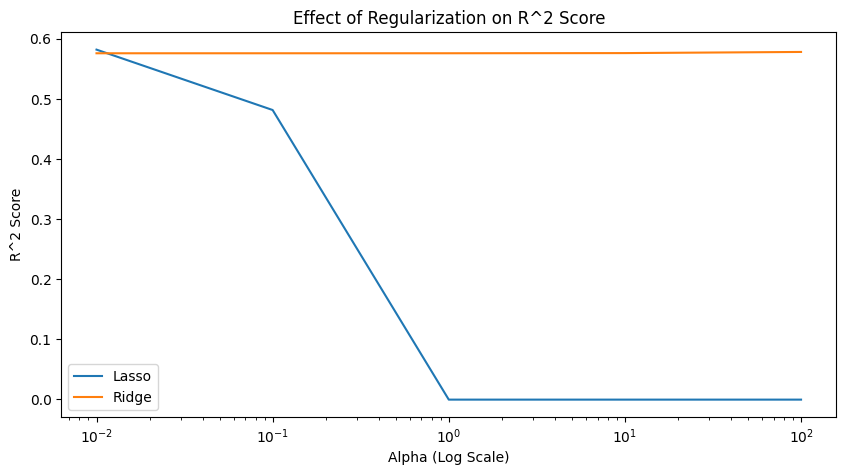

In [ ]:
import matplotlib.pyplot as plt

# Переопределим данные для создания графиков
r2_scores_lasso = []
r2_scores_ridge = []

# Тестируем Lasso регрессию и Ridge регрессию, сохраняем результаты R^2
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_scores_lasso.append(r2_score(y_test, y_pred_lasso))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2_scores_ridge.append(r2_score(y_test, y_pred_ridge))

# Создаем графики
plt.figure(figsize=(10, 5))
plt.plot(alphas, r2_scores_lasso, label='Lasso')
plt.plot(alphas, r2_scores_ridge, label='Ridge')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('R^2 Score')
plt.title('Effect of Regularization on R^2 Score')
plt.legend()
plt.show()


Регуляризация влияет на коэффициенты модели, добавляя к функции потерь штраф за большие веса, что помогает управлять переобучением и улучшать обобщающую способность модели.

L1-регуляризация (Lasso) может привести к обнулению некоторых коэффициентов модели. Это происходит из-за того, что L1 добавляет к функции потерь штраф, пропорциональный абсолютным значениям весов. Когда альфа увеличивается, более высока вероятность, что некоторые веса будут обнулены, что эффективно удаляет некоторые признаки из модели, делая L1 полезным для отбора признаков.

L2-регуляризация (Ridge), с другой стороны, штрафует коэффициенты, добавляя к функции потерь штраф, пропорциональный квадратам весов. Этот тип регуляризации снижает величину весов, но не обнуляет их, поэтому все признаки остаются в модели, хотя их влияние уменьшается. Это ограничивает влияние отдельных признаков на предсказание и борется с переобучением, но не способствует отбору признаков.

Определение оптимального значения параметра регуляризации обычно осуществляется с помощью техники, называемой кросс-валидацией. Можно использовать инструменты, такие как `GridSearchCV` или `RandomizedSearchCV` из библиотеки `sklearn`, чтобы систематически исследовать различные значения альфа и найти то, которое дает лучшую производительность модели на валидационных данных.

## Задание 4

Анализ способности к обобщению

- Постройте графики кривых обучения для вашей модели линейной регрессии, отображая ошибки на тренировочной и валидационной выборке в зависимости от размера обучающей выборки.
- Что можно сказать о способности модели к обобщению, основываясь на этих графиках?
Какие шаги можно предпринять, если график указывает на переобучение или недообучение модели?

Вопросы к заданию:
- Какие факторы могут привести к переобучению модели, согласно графику кривой обучения?
- Какие методы могут помочь улучшить способность модели к обобщению?


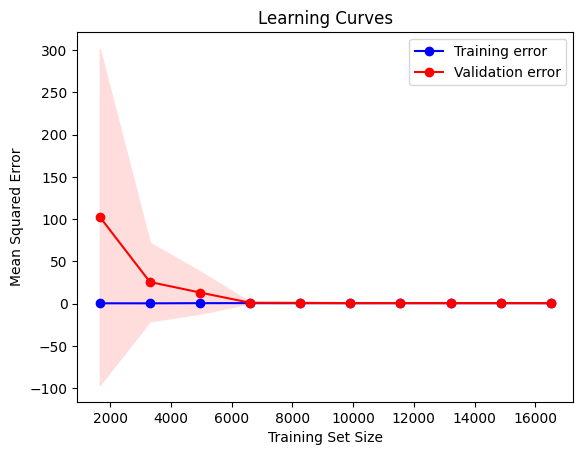

In [ ]:
from sklearn.model_selection import learning_curve
# Создание модели линейной регрессии
model = LinearRegression()

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Средние значения и стандартное отклонение ошибок обучения
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = -np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Основные наблюдения:
1. Первоначальное поведение:
   - При малом размере обучающего набора (около 2000), ошибка на валидационной выборке очень высокая и начинает уменьшаться с увеличением набора данных.
   - Ошибка на обучающей выборке изначально низкая, что может свидетельствовать о переобучении на малых данных.

2. Сходимость ошибок:
   - Начиная с некоторого размера обучающего набора (примерно 6000), ошибки на обучающей и валидационной выборках начинают сходиться.
   - Вполне возможно, что модель стабилизируется, как только достигается определенный объем данных.

3. Высокая дисперсия валидационной ошибки:
   - В начале наблюдается высокая дисперсия валидационной ошибки, о чем свидетельствует широкая полоска вокруг красной линии. По мере увеличения размера обучающей выборки эта дисперсия уменьшается, что может указывать на недостаточную обобщающую способность модели на малых данных.

Выводы:
1. Недостаток данных:
   - На начальных этапах обучение на малых данных приводит к высокой ошибке на валидации и низкой ошибке на обучении, что свидетельствует о переобучении.
   
2. Объем данных имеет значение:
   - Модель начинает улучшаться по мере увеличения размера обучающего набора, что приводит к уменьшению разницы между ошибкой на обучении и валидацией.
   - Достигнув определенного объема (примерно 6000 и более), ошибки становятся стабильными и равными.

3. Рекомендации:
   - Убедитесь, что используете достаточное количество данных для обучения модели, чтобы избежать переобучения.
   - Если проблема переобучения сохраняется даже при увеличении количества данных, рассмотреть возможность настройки гиперпараметров модели или применения методов регуляризации для улучшения ее обобщающей способности.

Таким образом, график демонстрирует, что с увеличением объема данных модель начинает обучаться лучше и стабилизируется, что указывает на необходимость большого набора данных для достижения устойчивых результатов.

Шаги при переобучении или недообучении:
- Переобучение: Добавить больше данных, использовать регуляризацию (L1, L2), уменьшить число признаков.
- Недообучение: Увеличить число признаков (если возможно), уменьшить степень регуляризации, использовать более сложные модели.

Факторы, приводящие к переобучению:
- Маленький объем тренировочных данных.
- Слишком сложная модель для данного объема данных.
- Неиспользование регуляризации.

Методы улучшения обобщения:
- Кросс-валидация.
- Регуляризация (L1, L2).
- Увеличение размера тренировочного набора данных.

##Домашнее задание

Задание  
Ваша задача - построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.
2. Обучение модели
  - Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
  - Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.
3. Анализ результатов
  - Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
  - Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?
4. Отчёт
  - Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.
